# **Project work: Title**

**Module:** Image and Signal Processing (ISP-AD23-FS25)  
**Authors:** Hädener Anja, Heini Sara, Huber Yeji       
**Date:** 14.05.2025


## **Introduction**

**What problem are you addressing, and why is it relevant?**     

In pharmaceutical manufacturing, especially during the production of pre-filled syringes and similar medical devices, visual inspection for quality control is a mandatory and highly critical step. Currently, this process is carried out manually by trained personnel who inspect each syringe for potential defects such as air bubbles, foreign particles, or missing liquid content.     
However, manual inspection poses several challenges: it requires significant training time, is susceptible to human error, and leads to rapid visual fatigue. In real-world operations, inspectors typically need to take a break after 30 minutes of work due to eye strain. Additionally, to maximize production efficiency, manufacturing lines often run continuously—including overnight shifts—which makes it difficult and costly to rely exclusively on human labor.     
If this process could be automated, it could address many of these issues: reducing training overhead, minimizing errors, supporting 24/7 operations, and improving overall manufacturing throughput and consistency.

**What kind of image or signal data are you working with?**     

We are working with RGB image data captured via webcam. The dataset includes images of syringes in various conditions:

(1) Reference syringes (usable)     
(2) Syringes containing air bubbles      
(3) Syringes with foreign objects     
(4) Empty syringes     

These images are used for both training and evaluating a classification model that determines whether a syringe is usable or defective.

**What is the main goal of your processing task?**     

The main objective of our image processing task is to build an automated system that analyzes real-time images of syringes and determines whether each one meets usability criteria. By comparing the live input to reference examples using computer vision techniques, the system should be able to detect visual anomalies such as air bubbles, contamination, or missing liquid. Ultimately, the goal is to support or replace human inspection in pharmaceutical quality control—ensuring consistent accuracy while enabling 
high-throughput and around-the-clock production.

<span style="color:#2D8FF3;font-style:italic">
<b>Instructions:</b>
Use this section to introduce and motivate your project. Provide enough context for fellow students to understand your goals.

<ul style="color:#2D8FF3">
    <li>What problem are you addressing, and why is it relevant?</li>
    <li>What kind of image or signal data are you working with?</li>
    <li>What is the main goal of your processing task?</li>
</ul>

---
## **Setup**

<span style="color:#2D8FF3;font-style:italic">
<b>Instructions:</b>
This section is about configuring the Jupyter Notebook.  
You don't need to do much here – just make sure everything runs correctly.
</span>


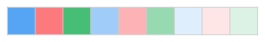

In [7]:
# Basic imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 as cv
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Enable vectorized graphics
%config InlineBackend.figure_formats = ["svg"]
%matplotlib inline

# Setup plotting
PALETTE = [ (0.341, 0.648, 0.962, 1.0), 
            (0.990, 0.476, 0.494, 1.0), 
            (0.281, 0.749, 0.463, 1.0), 
            (0.629, 0.802, 0.978, 1.0), 
            (0.994, 0.705, 0.715, 1.0), 
            (0.595, 0.858, 0.698, 1.0), 
            (0.876, 0.934, 0.992, 1.0), 
            (0.998, 0.901, 0.905, 1.0), 
            (0.865, 0.952, 0.899, 1.0) ]

sns.palplot(PALETTE, size=0.5)
sns.set_style("whitegrid")
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=PALETTE)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["pdf.fonttype"] = 42

---
## **Implementation**

<span style="color:#2D8FF3;font-style:italic">
<b>Instructions:</b>
In this section, explain how you implemented your solution, focusing on the key processing steps and how they were translated into code. Justify your design choices and parameter settings, and describe any challenges you encountered during development. Structure this part like a tutorial to make it easy for fellow students to follow and learn from your approach.

<ul style="color:#2D8FF3">
    <li>Which key functions, algorithms, or libraries (e.g., NumPy, OpenCV, librosa, etc.) did you use?</li>
    <li>How is your processing pipeline structured? (e.g., filtering → transformation → output)</li>
    <li>Explain any relevant design decisions (e.g., kernel size, interpolation method, threshold values).</li>
    <li>If you implemented parts yourself (e.g., a filter or transform), briefly explain how.</li>
</ul>

<b>Hint:</b> To keep your code clean and modular, encapsulate your processing or feature (as well as the intermediate processing steps) into functions. See the example below for illustration

</span>





## Implementation

This project was implemented in Python using several standard libraries for image processing and machine learning, primarily **OpenCV**, **NumPy**, **Matplotlib**, and **scikit-learn**.

### 1. Key Libraries and Tools
- **OpenCV**: Used for live video capture, image preprocessing, contour detection, and drawing.
- **NumPy**: Used for numerical operations and array manipulations.
- **Matplotlib** and **Seaborn**: Used for visualization and plotting.
- **scikit-learn**: Used to implement a basic machine learning pipeline (Random Forest classifier).

### 2. Processing Pipeline Structure
The processing pipeline is modular and follows this structure:

1. **Capture**: A live video feed is accessed via `cv.VideoCapture(0)`.
2. **Preprocessing**: Each frame is converted to grayscale, smoothed using a Gaussian blur, and processed using Canny edge detection.
3. **Contour Detection**: External contours are extracted from the edge map using `cv.findContours()`.
4. **Filtering**: Only contours within a specified area range are retained to eliminate noise and background elements.
5. **Bounding and ROI Saving**: Valid contours are highlighted on the video stream, and the corresponding regions (ROIs) are saved to disk.
6. **Machine Learning Integration** (offline): A `RandomForestClassifier` is trained to distinguish between “ok” and “defect” syringe samples.

Each step is encapsulated in a Python function for clarity and reusability.

### 3. Design Decisions and Parameters
- **Canny edge thresholds**: `(30, 100)` for sensitivity to small defects.
- **Gaussian blur kernel size**: `(5, 5)` to reduce noise while maintaining edge quality.
- **Contour area filtering**: Only areas between `500` and `30000` pixels are considered relevant.
- **ROI resize for ML**: Each image is resized to `64×64` for training, balancing detail with performance.

### 4. Challenges Encountered
- The syringe needs to be held very close to the camera to detect fine surface defects.
- Initial Canny thresholds were too high and failed to capture small scratches or cracks.
- Uneven lighting conditions introduced noise; consistent illumination improved accuracy.
- Automating the ROI extraction and naming was necessary for efficient dataset generation.

### 5. Modularity
All main processing steps are implemented as standalone functions:

- `preprocess_frame(frame)`
- `find_valid_contours(edges)`
- `draw_bounding_boxes(frame, contours)`
- `save_rois(frame, contours, frame_id)`
- `load_dataset(base_path)`

This structure allows for easy extension, reuse, and integration of additional logic (e.g., classification, augmentation).

In [1]:
# 📦 Imports
import os
import cv2 as cv
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# 📍 Modellpfade anpassen
rf_model_path = 'syringe_model_dataset_weighted.pkl'  # Pfad zu deinem Random Forest
cnn_model_path = 'cnn_model.h5'  # Falls du das CNN gespeichert hast

# 📦 Modelle laden
rf_model = joblib.load(rf_model_path)
cnn_model = load_model(cnn_model_path)

ModuleNotFoundError: No module named 'tensorflow'

In [9]:
def run_detection():
    cap = cv.VideoCapture(0)
    cap.set(cv.CAP_PROP_FRAME_WIDTH, 1280)
    cap.set(cv.CAP_PROP_FRAME_HEIGHT, 720)
    frame_count = 0

    if not cap.isOpened():
        print("Camera not accessible.")
        return

    print("Camera is running. Press 'q' to quit.")

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Frame capture failed.")
            break

        edges = preprocess_frame(frame)
        valid_contours = find_largest_contour(edges)
        if valid_contours:
            display_frame = draw_bounding_boxes(frame.copy(), valid_contours)
            save_rois(frame, valid_contours, frame_count)
        else:
            display_frame = frame.copy()


        cv.imshow("Detected Regions", display_frame)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break

        frame_count += 1

    cap.release()
    cv.destroyAllWindows()

# Start detection
run_detection()

Camera is running. Press 'q' to quit.


In [10]:
def load_dataset(base_path="dataset", size=(64, 64)):
    data = []
    labels = []
    for label_name in ["ok", "defect"]:
        folder = os.path.join(base_path, label_name)
        for file in os.listdir(folder):
            path = os.path.join(folder, file)
            img = cv.imread(path, cv.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv.resize(img, size)
            data.append(img.flatten())
            labels.append(label_name)
    return np.array(data), np.array(labels)

In [11]:
def detect_liquid_level(edges):
    # Detect horizontal lines that could indicate liquid level
    lines = cv.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=100, maxLineGap=10)
    return lines is not None

def detect_bubbles(gray):
    # Use circle detection to find bubbles
    circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 20,
                            param1=50, param2=30, minRadius=5, maxRadius=30)
    return circles is not None

def detect_particles(gray):
    # Use contour detection with area filtering for particles
    _, thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
    contours, _ = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    return any(cv.contourArea(c) < 100 for c in contours)  # Small contours might be particles

In [12]:
def augment_data(image):
    """
    Augment a single image with various transformations to multiply the dataset.
    Returns a list of augmented images.
    """
    augmented = []
    
    # augment rotations at finer angles
    for angle in range(0, 360, 30):  # Rotate every 30 degrees
        matrix = cv.getRotationMatrix2D((image.shape[1]/2, image.shape[0]/2), angle, 1.0)
        rotated = cv.warpAffine(image, matrix, (image.shape[1], image.shape[0]))
        augmented.append(rotated)
    
    # augment flips and combinations
    flipped_h = cv.flip(image, 1)
    flipped_v = cv.flip(image, 0)
    flipped_both = cv.flip(image, -1)
    augmented.extend([flipped_h, flipped_v, flipped_both])
    
    # augment noise levels
    for sigma in [10, 20, 30]:
        noise = np.random.normal(0, sigma, image.shape).astype(np.uint8)
        noisy = cv.add(image, noise)
        augmented.append(noisy)
    
    # augment brightness adjustments
    for delta in [-50, -25, 25, 50]:
        if delta > 0:
            adjusted = cv.add(image, delta)
        else:
            adjusted = cv.subtract(image, abs(delta))
        augmented.append(adjusted)
    
    # augment blur levels
    for kernel_size in [(3,3), (5,5), (7,7)]:
        blurred = cv.GaussianBlur(image, kernel_size, 0)
        augmented.append(blurred)
    
    # Contrast adjustments
    for alpha in [0.5, 1.5]:  # Contrast factors
        contrasted = cv.convertScaleAbs(image, alpha=alpha, beta=0)
        augmented.append(contrasted)
    
    # Combinations of transformations
    for rot_img in augmented[:3]:  # Take first few rotated images
        noise = np.random.normal(0, 15, rot_img.shape).astype(np.uint8)
        combo = cv.add(rot_img, noise)
        combo = cv.GaussianBlur(combo, (3,3), 0)
        augmented.append(combo)
    
    return augmented

In [13]:
# Load original dataset and augment
X_orig, y_orig = load_dataset()

# Augment data
X_augmented = []
y_augmented = []

for img, label in zip(X_orig, y_orig):
    # Reshape flattened image back to 2D
    img_2d = img.reshape(64, 64)
    
    # Add original image
    X_augmented.append(img)
    y_augmented.append(label)
    
    # Add augmented versions
    augmented_images = augment_data(img_2d)
    for aug_img in augmented_images:
        X_augmented.append(aug_img.flatten())
        y_augmented.append(label)

# Convert to numpy arrays
X = np.array(X_augmented)
y = np.array(y_augmented)

print(f"Original dataset size: {len(X_orig)}")
print(f"Augmented dataset size: {len(X)}")

# Split augmented data into train/test sets
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model on augmented data
clf_aug = RandomForestClassifier(n_estimators=100, random_state=42)
clf_aug.fit(X_train_aug, y_train_aug)

# Evaluate model trained on augmented data
y_pred_aug = clf_aug.predict(X_test_aug)
print("\nModel performance with augmented training data:")
print(classification_report(y_test_aug, y_pred_aug))

Original dataset size: 58
Augmented dataset size: 1798

Model performance with augmented training data:
              precision    recall  f1-score   support

      defect       0.95      1.00      0.98       303
          ok       1.00      0.74      0.85        57

    accuracy                           0.96       360
   macro avg       0.98      0.87      0.91       360
weighted avg       0.96      0.96      0.96       360



In [14]:
def predict_roi(image, clf, size=(64, 64)):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    resized = cv.resize(gray, size).flatten().reshape(1, -1)
    return clf.predict(resized)[0]

---

## **Results**

<span style="color:#2D8FF3;font-style:italic">
<b>Instructions:</b>
Demonstrate the outcome of your solution. This section can be brief, but should show what your implementation produces.

<ul style="color:#2D8FF3">
    <li>Use representative input and output examples to illustrate the effect of your processing.</li>
    <li>Don't limit yourself to best-case results – also show cases where the method performs poorly or struggles.</li>
</ul>
</span>




In [15]:
# Load and predict on detected_rois with augmented model
predictions = load_and_predict_rois(clf_aug)

# Print summary
if predictions:
    ok_count = sum(1 for pred in predictions.values() if pred == "ok")
    defect_count = sum(1 for pred in predictions.values() if pred == "defect")
    print("\nSummary:")
    print(f"Total ROIs processed: {len(predictions)}")
    print(f"OK syringes: {ok_count}")
    print(f"Defective syringes: {defect_count}")
else:
    print("\nNo ROIs were processed. Make sure there are PNG images in the 'detected_rois' directory.")


NameError: name 'load_and_predict_rois' is not defined

---

## **Discussion**

<span style="color:#2D8FF3;font-style:italic">
<b>Instructions:</b>
Reflect on your results and the overall performance of your solution. This section helps you and others understand what worked well, what did not, and why.

<ul>
    <li>Interpret your results: What patterns or weaknesses did you observe?</li>
    <li>How robust is your solution to variations in the input (e.g., noise, contrast, lighting)?</li>
    <li>Were there cases where your method failed or produced unexpected results? Why?</li>
    <li>What could be improved or extended in a future version?</li>
    <li>If applicable, compare your method to alternatives or standard approaches.</li>
</ul>

Be honest and analytical – this section is not about perfection, but about insight.
</span>



---

## **Appendix**

### **How to convert a Jupyter Notebook into a PDF**



<span style="color:#2D8FF3;font-style:italic">

<ul>
    <li>Run the entire Jupyter notebook and save it.</li>
    <li>Open a terminal and run the following command.<br>
       <tt></tt>
    </li>
     <div style="border: 1px solid #ccc; 
                 color: #A0A0A0;
                 padding: 4px; 
                 background-color: #f9f9f9; 
                 border-radius: 4px; 
                 width: 100%;
                 max-width: 60%;">
        <tt>jupyter nbconvert --to html "path/to/your/notebook.ipynb"</tt>.
    </div>
    <li>This creates a file notebook.html in the current working directory.</li>
    <li>Open the document in a web browser (the Opera browser works best, as it saves single-page PDFs!)</li>
    <li>Save as PDF</li>
</ul>
</span>